# Spanish Translation A/B Test
   Company XYZ is a worldwide e-commerce site with localized versions of the site.
   
   A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.
   
   Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.
   
   After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!

* Are the localized translations really worse?

## Columns:
* user_id : the id of the user. Unique by user. Can be joined to user id in the other table. For each user, we just check whether conversion happens the first time they land on the site since the test started.
* date : when they came to the site for the first time since the test started
* source : marketing channel: Ads, SEO, Direct . Direct means everything except for ads and SEO. Such as directly typing site URL on the browser, downloading the app w/o coming from SEO or Ads, referral friend, etc.
* device : device used by the user. It can be mobile or web
* browser_language : in browser or app settings, the language chosen by the user. It can be EN, ES, Other (Other means any language except for English and Spanish) ads_channel : if marketing channel is ads, this is the site where the ad was displayed. It can be: Google, Facebook, Bing, Yahoo ,Other. If the user didn't come via an ad, this field is NA
* browser : user browser. It can be: IE, Chrome, Android_App, FireFox, Iphone_App, Safari, Opera
* conversion : whether the user converted (1) or not (0). This is our label. A test is considered successful if it increases the proportion of users who convert.
* test : users are randomly split into test (1) and control (0). Test users see the new translation and control the old one. For Spain-based users, this is obviously always 0 since there is no change there.
* sex : user sex: Male or Female
* age : user age (self-reported)
* country : user country based on ip address

## Data Explore

In [15]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read Data
test = pd.read_csv('test_table.csv')
user = pd.read_csv('user_table.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [3]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [4]:
# The total users in the each table
test['user_id'].nunique() - user['user_id'].nunique()

454

### Conclusion: 
Looks like the user table is busted and we have some user ids missing. When joining, we have to be careful to do not lose the user ids in the test table, but not in the user table.

In [5]:
#Merge table
df = pd.merge(test, user,how='left', on = ['user_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [35]:
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [64]:
df[df['age']>70]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country


## Question one:
   Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs 

In [7]:
old_version = df[df['test'] == 0]

In [30]:
old_version.groupby('country')['conversion'].mean().nlargest(7)

country
Spain          0.079719
El Salvador    0.053554
Nicaragua      0.052647
Costa Rica     0.052256
Colombia       0.052089
Honduras       0.050906
Guatemala      0.050643
Name: conversion, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

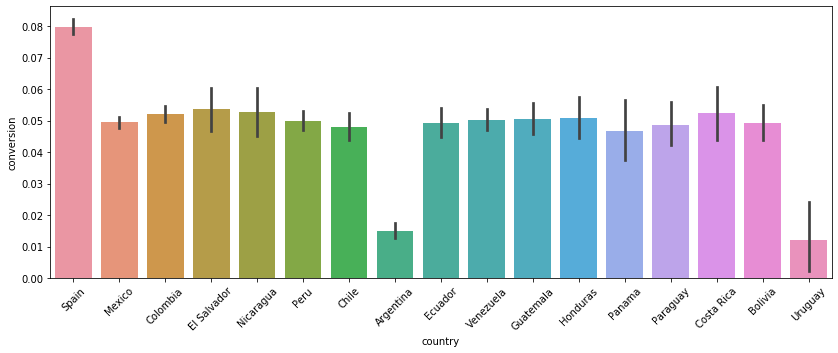

In [29]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'country', y = 'conversion', data = old_version)
plt.xticks(rotation=45)  

#### Conclusion:
Yes, Spain has highest conversion rate in control group.

## Question two(A/B testing):
  Explain why that might be happening. Are the localized translations really worse?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

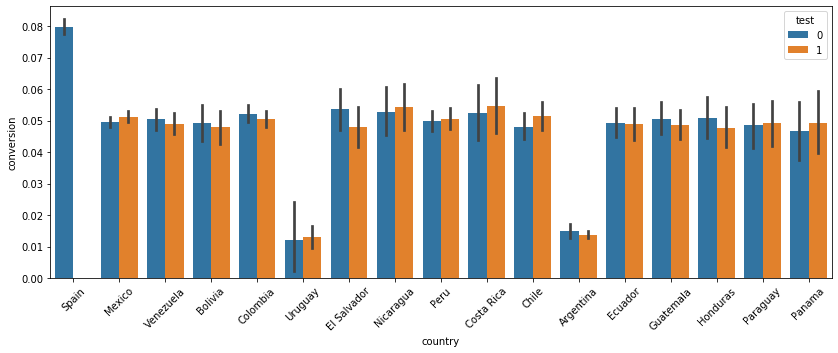

In [28]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'country', y = 'conversion', hue = 'test', data = df)
plt.xticks(rotation=45) 

In [31]:
new_version = df[df['test'] == 1]

In [32]:
new_version[new_version['country'] != 'Spain']['conversion'].mean()

0.043424713982118966

In [33]:
old_version[old_version['country'] != 'Spain']['conversion'].mean()

0.04833042316066309

#### Conclusion:
Localized translations drop the conversion rate from 4.8% to 4.3%. That’s a 10% drop, which would be dramatic if it were true. 

The most likely reason for weird A/B test results are:
* We didn’t collect enough data.
* Some bias has been introduced in the experiment so that test/control people are not really random.

## Question Three:
Design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

In [34]:
df_l = df[df['country'] != 'Spain']

Text(0.5, 1.0, 'Conversion Rate per Source')

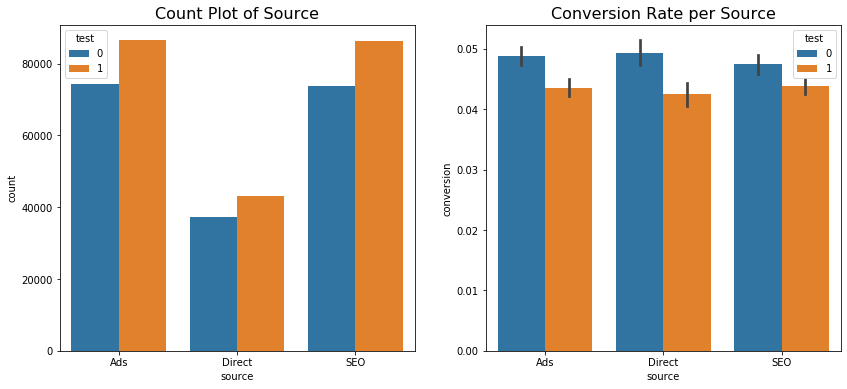

<Figure size 1008x360 with 0 Axes>

In [86]:
#source
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.countplot(x = 'source', hue = 'test', data = df_l, ax=ax[0])
ax[0].set_title('Count Plot of Source', fontsize=16)


plt.figure(figsize=(14,5))
sns.barplot(x = 'source', y = 'conversion', hue = 'test', data = df_l, ax=ax[1])
ax[1].set_title('Conversion Rate per Source', fontsize=16)

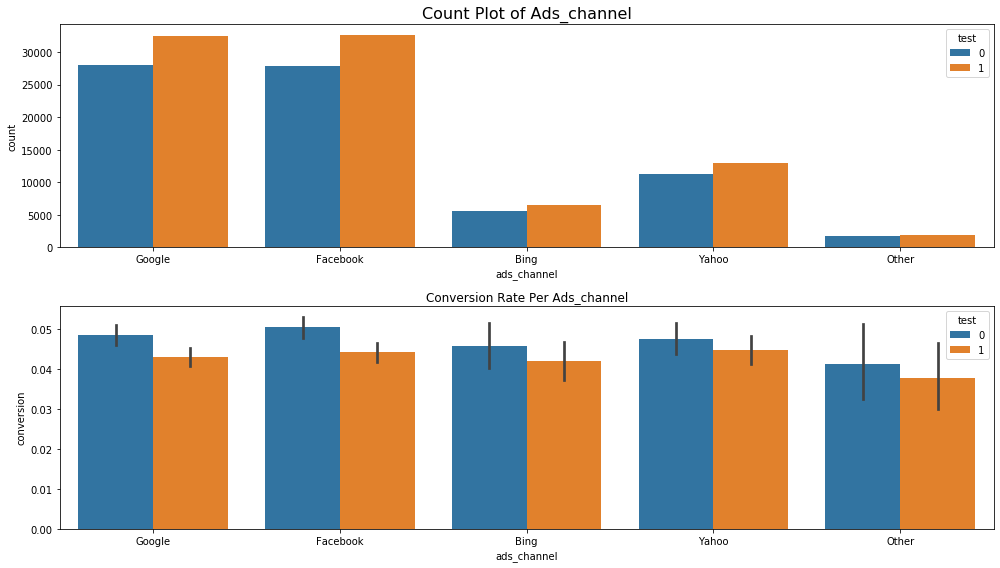

In [89]:
#ads_channel
df_ads = df_l[df_l['source']=='Ads']
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,8))

sns.countplot(x = 'ads_channel', hue = 'test', data = df_ads, ax=ax[0])
ax[0].set_title('Count Plot of Ads_channel', fontsize=16)


sns.barplot(x = 'ads_channel', y = 'conversion', hue = 'test', data = df_ads, ax=ax[1])
ax[1].set_title('Conversion Rate Per Ads_channel')
plt.tight_layout()

Text(0.5, 1.0, 'Conversion Rate Between Browser_language')

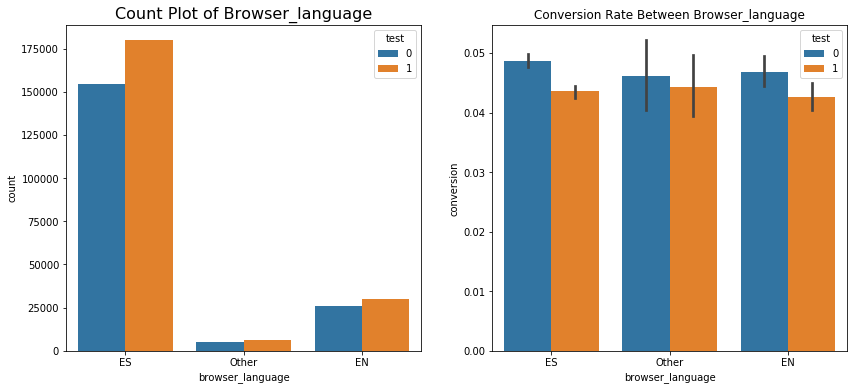

In [90]:
#browser_language
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.countplot(x = 'browser_language', hue = 'test', data = df_l, ax=ax[0])
ax[0].set_title('Count Plot of Browser_language', fontsize=16)

sns.barplot(x = 'browser_language', y = 'conversion', hue = 'test', data = df_l, ax=ax[1])
ax[1].set_title('Conversion Rate Between Browser_language')

Text(0.5, 1.0, 'Conversion Rate Between Different Devices')

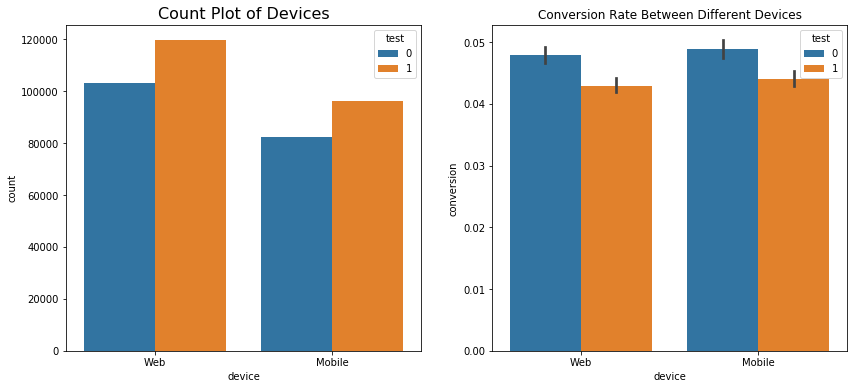

In [91]:
#device
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.countplot(x = 'device', hue = 'test', data = df_l, ax=ax[0])
ax[0].set_title('Count Plot of Devices', fontsize=16)

sns.barplot(x = 'device', y = 'conversion', hue = 'test', data = df_l, ax=ax[1])
ax[1].set_title('Conversion Rate Between Different Devices')



Text(0.5, 1.0, 'Conversion Rate Per Browser')

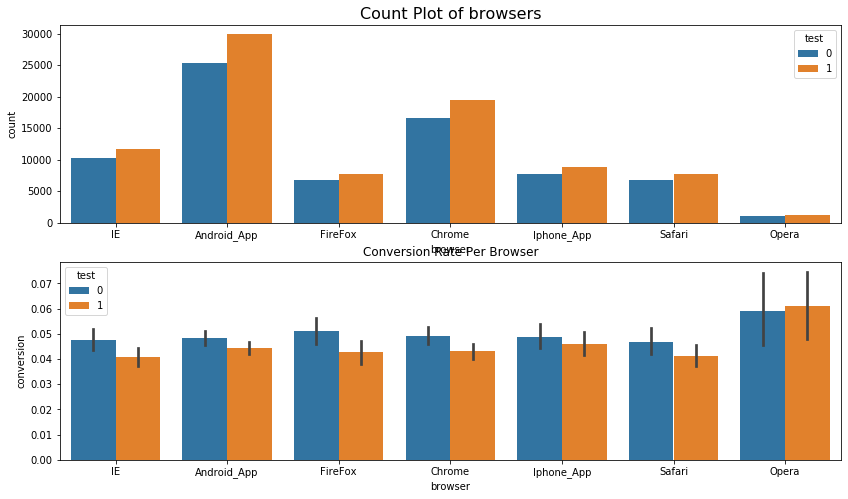

In [92]:
#browser

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,8))

sns.countplot(x = 'browser', hue = 'test', data = df_ads, ax=ax[0])
ax[0].set_title('Count Plot of browsers', fontsize=16)


sns.barplot(x = 'browser', y = 'conversion', hue = 'test', data = df_ads, ax=ax[1])
ax[1].set_title('Conversion Rate Per Browser')


Text(0.5, 1.0, 'Conversion Rate Between Sex')

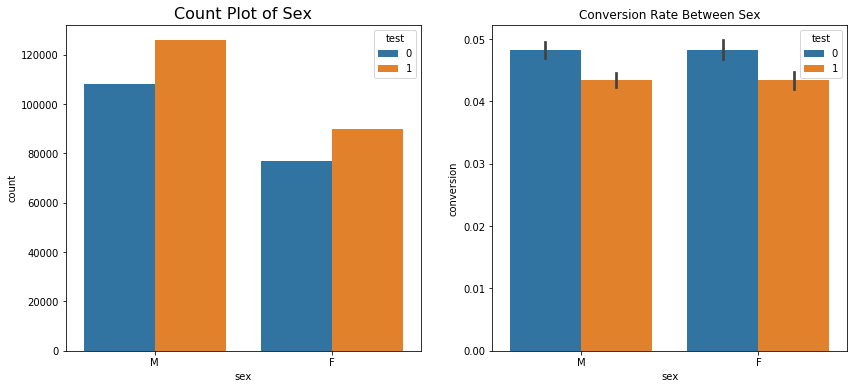

In [93]:
#sex
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.countplot(x = 'sex', hue = 'test', data = df_l, ax=ax[0])
ax[0].set_title('Count Plot of Sex', fontsize=16)

sns.barplot(x = 'sex', y = 'conversion', hue = 'test', data = df_l, ax=ax[1])
ax[1].set_title('Conversion Rate Between Sex')


Text(0.5, 1.0, 'Conversion rate between different age')

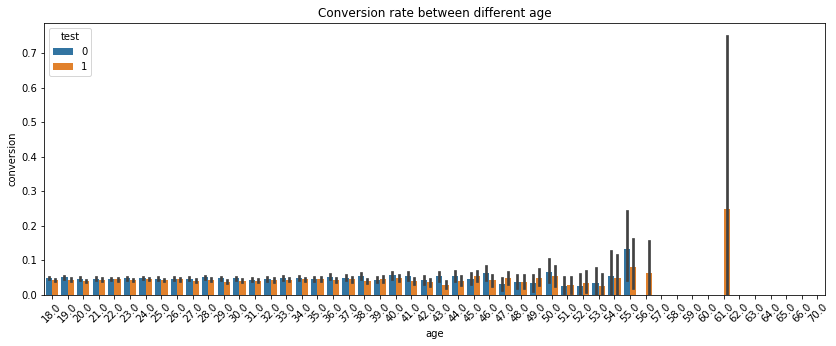

In [73]:
#age
plt.figure(figsize=(14,5))
sns.barplot(x = 'age', y = 'conversion', hue = 'test', data = df_l)
plt.xticks(rotation=45) 
plt.title('Conversion rate between different age')

In [82]:
#age setting
bins= [0,31,41,51,65]
labels = ['Under30','30s','40s','Above50']
df_l['AgeGroup'] = pd.cut(df_l['age'], bins=bins, labels=labels, right=False)
df_l.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,AgeGroup
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico,Under30
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico,Under30
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico,Under30
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela,Under30
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico,30s


Text(0.5, 1.0, 'Conversion Rate Between AgeGroup')

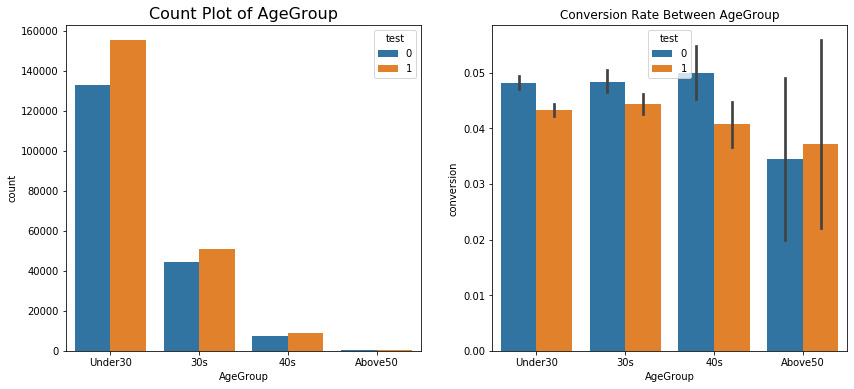

In [94]:
#age after seeting

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.countplot(x = 'AgeGroup', hue = 'test', data = df_l, ax=ax[0])
ax[0].set_title('Count Plot of AgeGroup', fontsize=16)

sns.barplot(x = 'AgeGroup', y = 'conversion', hue = 'test', data = df_l, ax=ax[1])
ax[1].set_title('Conversion Rate Between AgeGroup')


Text(0.5, 1.0, 'Conversion Rate Per country')

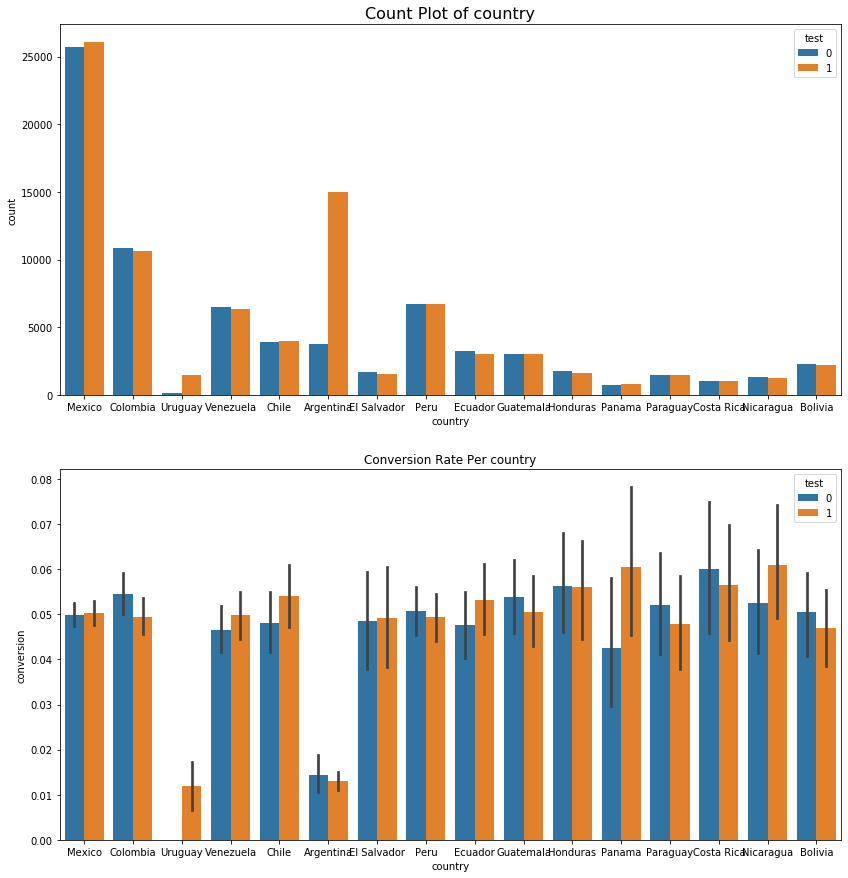

In [103]:
#country

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,15))

sns.countplot(x = 'country', hue = 'test', data = df_ads, ax=ax[0])
ax[0].set_title('Count Plot of country', fontsize=16)
#ax[0].tick_params(rotation=45)

sns.barplot(x = 'country', y = 'conversion', hue = 'test', data = df_ads, ax=ax[1])
ax[1].set_title('Conversion Rate Per country')
#ax[1].tick_params(rotation=45)


In [42]:
df_l.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico


Text(0.5, 1.0, 'Conversion Rate Per date')

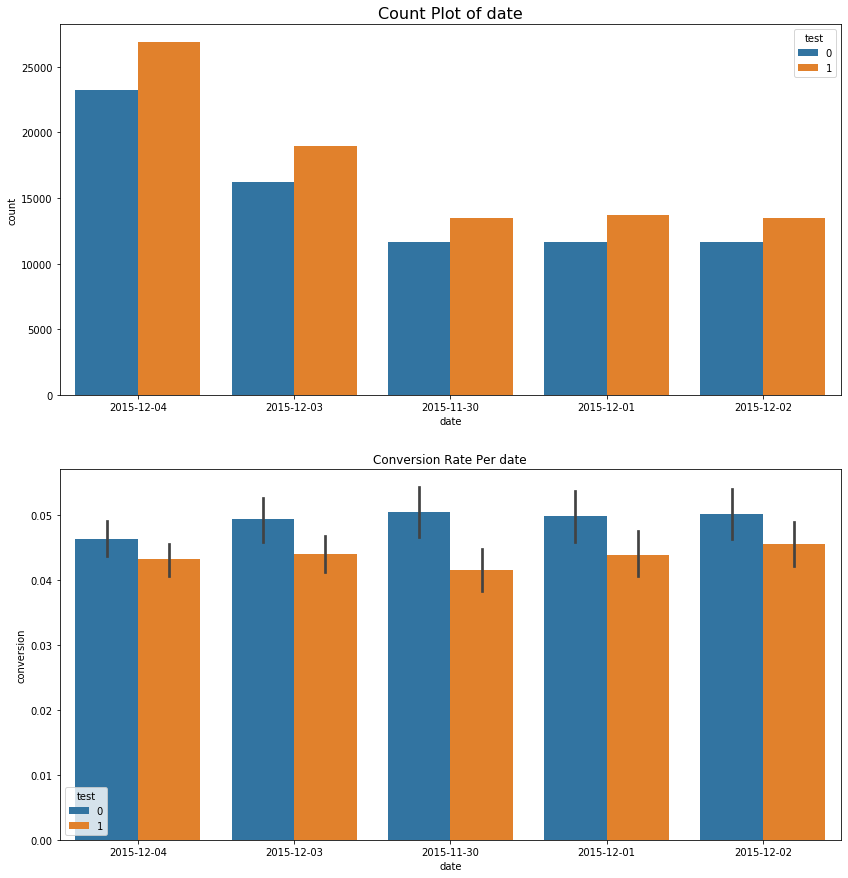

In [104]:
# Time
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,15))

sns.countplot(x = 'date', hue = 'test', data = df_ads, ax=ax[0])
ax[0].set_title('Count Plot of date', fontsize=16)
#ax[0].tick_params(rotation=45)

sns.barplot(x = 'date', y = 'conversion', hue = 'test', data = df_ads, ax=ax[1])
ax[1].set_title('Conversion Rate Per date')


In [39]:
#Time
df_l.groupby('date')['conversion'].mean()

date
2015-11-30    0.047343
2015-12-01    0.043649
2015-12-02    0.046233
2015-12-03    0.046381
2015-12-04    0.045132
Name: conversion, dtype: float64

#### From the above, we notice a couple of things:
1. We just ran it for 5 days. We should always run the test for at least 1 full week to capture weekly patterns, 2 weeks would be much better.
2. Test has constantly been worse than control and there is relatively little variance across days. That probably means that we do have enough data, but there was some bias in the experiment set up.
3. When we sperate the consumer to different groups, most of consumers are under 30.